# Packages

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from scipy.stats import ks_2samp, ttest_ind
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression

# Load data

In [2]:
# load the original dataset and the synthetic dataset into pandas dataframes
original_df = pd.read_csv("GAS_original-FS.csv")
original_data = original_df
synthetic_df = pd.read_csv("synthetic_data-GAN(1).csv")
gan_data = pd.read_csv("synthetic_data-GAN(1).csv")
gmm_data = pd.read_csv("synthetic_data-GMM(4).csv")
vae_data = pd.read_csv("synthetic_data-VAE(3).csv")

In [6]:
# Compute basic statistics for each dataset
original_stats = original_data.describe()
gan_stats = gan_data.describe()
gmm_stats = gmm_data.describe()
vae_stats = vae_data.describe()

# Print the statistics
print("Original Data:\n", original_stats)
print("\nGAN Data:\n", gan_stats)
print("\nGMM Data:\n", gmm_stats)
print("\nVAE Data:\n", vae_stats)

Original Data:
        response_address   resp_length  response_memory  resp_write_fun  \
count      97019.000000  97019.000000     97019.000000    97019.000000   
mean           3.719436     26.294654       216.657170        9.298591   
std            1.021543     26.560107        59.504855        2.553856   
min            0.000000     19.000000         0.000000        0.000000   
25%            4.000000     19.000000       233.000000       10.000000   
50%            4.000000     19.000000       233.000000       10.000000   
75%            4.000000     19.000000       233.000000       10.000000   
max            4.000000    123.000000       233.000000       10.000000   

       response_memory_count  resp_read_fun      setpoint  control_mode  \
count           97019.000000   97019.000000  97019.000000  97019.000000   
mean               16.737464       2.449963     24.166607      0.899659   
std                 4.596942       0.893052     14.322356      0.991003   
min              

# Histogram

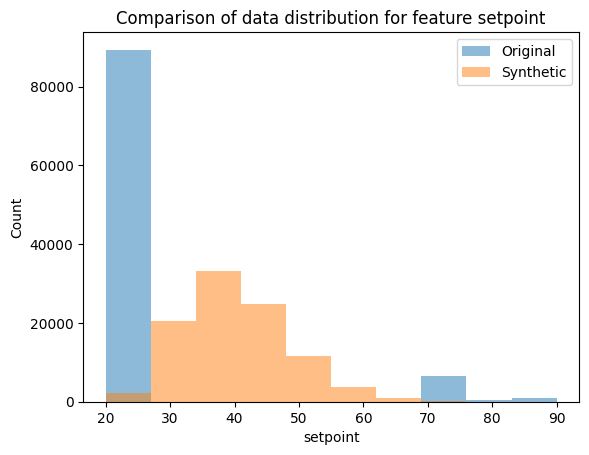

In [7]:
# select a feature to compare the data distribution
feature_name = "setpoint"

# create a histogram of the original dataset
plt.hist(original_df[feature_name], bins=10, alpha=0.5, label="Original")

# create a histogram of the synthetic dataset
plt.hist(synthetic_df[feature_name], bins=10, alpha=0.5, label="Synthetic")

# add labels and a title to the plot
plt.xlabel(feature_name)
plt.ylabel("Count")
plt.title("Comparison of data distribution for feature " + feature_name)

# show the legend and plot
plt.legend()
plt.show()

# Scatter Plot

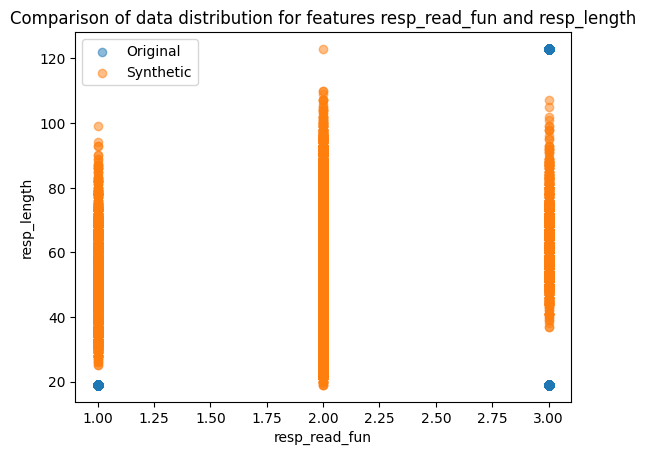

In [8]:
# select two features to compare the data distribution
feature1_name = "resp_read_fun"
feature2_name = "resp_length"

# create a scatter plot of the original dataset
plt.scatter(original_df[feature1_name],
            original_df[feature2_name], alpha=0.5, label="Original")

# create a scatter plot of the synthetic dataset
plt.scatter(synthetic_df[feature1_name],
            synthetic_df[feature2_name], alpha=0.5, label="Synthetic")

# add labels and a title to the plot
plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title("Comparison of data distribution for features " +
          feature1_name + " and " + feature2_name)

# show the legend and plot
plt.legend()
plt.show()

# Density Plot

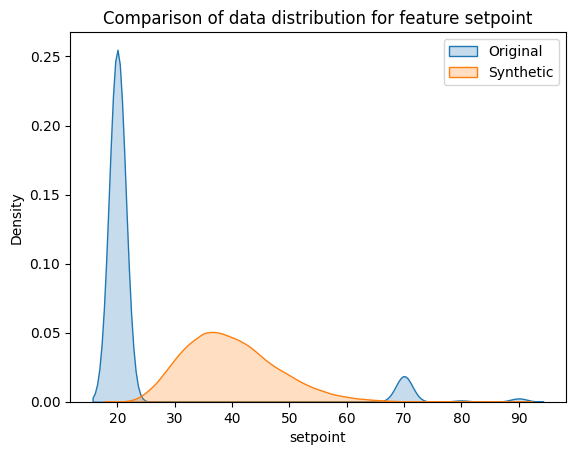

In [9]:
# create a density plot of the original dataset
sns.kdeplot(original_df[feature_name], shade=True, label="Original")

# create a density plot of the synthetic dataset
sns.kdeplot(synthetic_df[feature_name], shade=True, label="Synthetic")

# add labels and a title to the plot
plt.xlabel(feature_name)
plt.ylabel("Density")
plt.title("Comparison of data distribution for feature " + feature_name)

# show the legend and plot
plt.legend()
plt.show()

# Correlation 

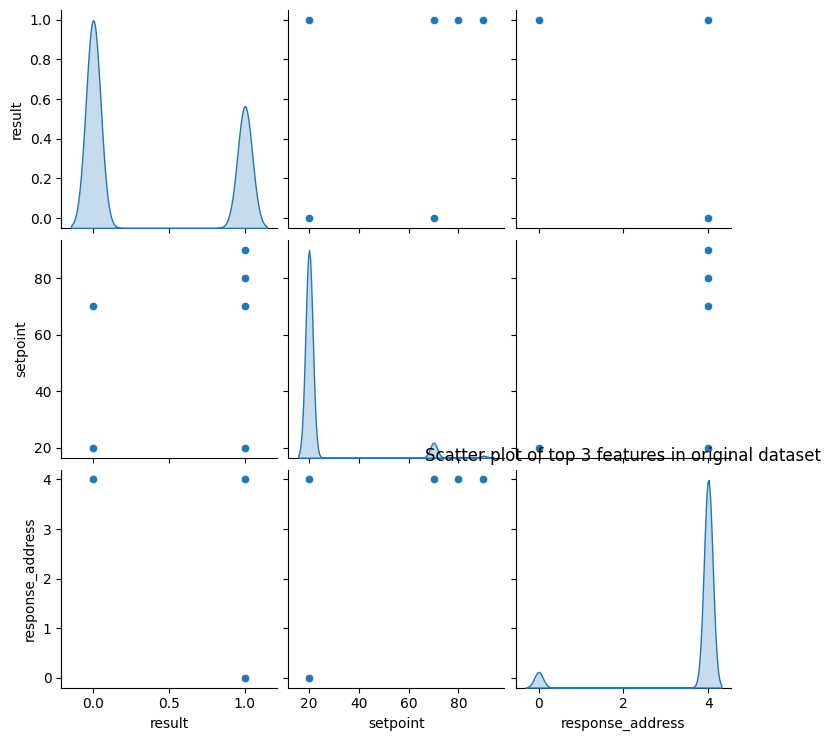

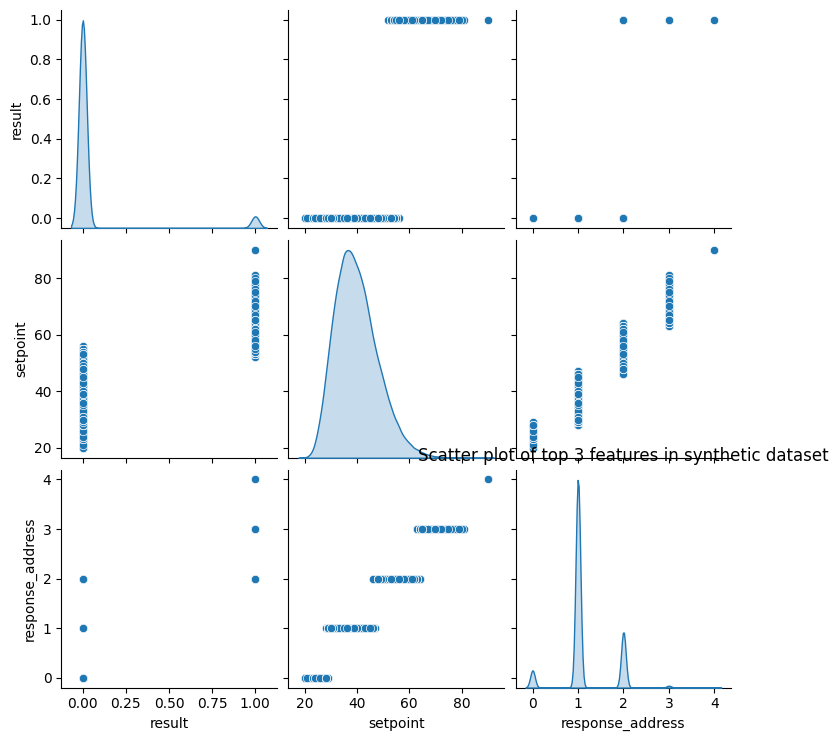

In [10]:
# create a correlation matrix for the original dataset
original_corr = original_df.corr()

# sort the correlation matrix by descending order of correlation values and select the top 3 features
top3_corr = original_corr.abs().nlargest(3, 'result')['result'].index
top3_corr_df = original_df[top3_corr]

# create a scatter plot of the original dataset's top 3 features
sns.pairplot(top3_corr_df, diag_kind='kde')
plt.title("Scatter plot of top 3 features in original dataset")

# create a scatter plot of the synthetic dataset's top 3 features
sns.pairplot(synthetic_df[top3_corr], diag_kind='kde')
plt.title("Scatter plot of top 3 features in synthetic dataset")

# # plot the original correlation matrix for the top 3 features
# sns.heatmap(original_corr.loc[top3_corr, top3_corr], annot=True)
# plt.title("Original Dataset Correlation Matrix for top 3 features")

# # create a correlation matrix for the synthetic dataset's top 3 features
# synthetic_corr = synthetic_df[top3_corr].corr()

# # plot the synthetic correlation matrix for the top 3 features
# sns.heatmap(synthetic_corr, annot=True)
# plt.title("Synthetic Dataset Correlation Matrix for top 3 features")

plt.show()

# Outliers

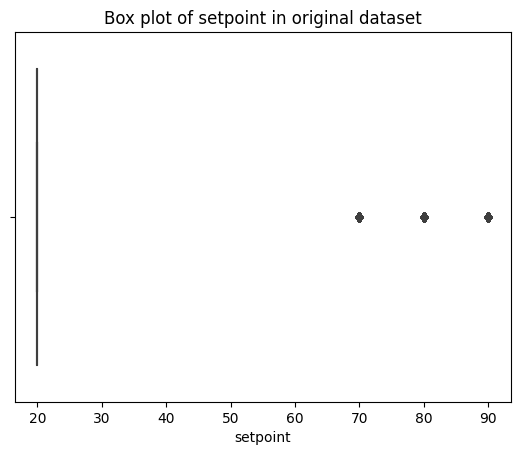

In [3]:
# select a feature with outliers from the original dataset
outlier_feature = 'setpoint'

# create a box plot of the original dataset's outlier feature
sns.boxplot(x=original_df[outlier_feature])
plt.title("Box plot of {} in original dataset".format(outlier_feature))

# # create a box plot of the synthetic dataset's outlier feature
# sns.boxplot(x=synthetic_df[outlier_feature])
# plt.title("Box plot of {} in synthetic dataset".format(outlier_feature))

plt.show()

# t-SNE plot:

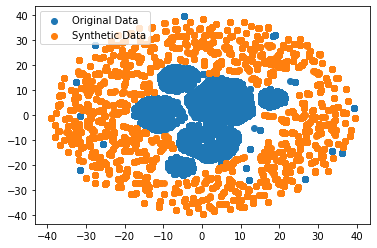

In [6]:
from sklearn.manifold import TSNE
import numpy as np
original_data = original_df
synthetic_data = gan_data
# Perform t-SNE embedding on original and synthetic data
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(np.vstack((original_data, synthetic_data)))

# Visualize the data using scatter plot
plt.scatter(X_tsne[:len(original_data), 0], X_tsne[:len(original_data), 1], label='Original Data')
plt.scatter(X_tsne[len(original_data):, 0], X_tsne[len(original_data):, 1], label='Synthetic Data')
plt.legend()
plt.show()

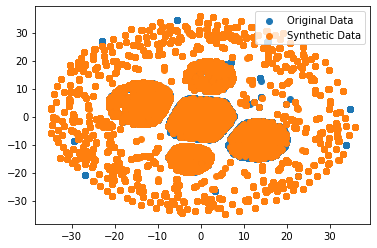

In [8]:
from sklearn.manifold import TSNE
import numpy as np
original_data = original_df
synthetic_data = gmm_data
# Perform t-SNE embedding on original and synthetic data
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(np.vstack((original_data, synthetic_data)))

# Visualize the data using scatter plot
plt.scatter(X_tsne[:len(original_data), 0], X_tsne[:len(original_data), 1], label='Original Data')
plt.scatter(X_tsne[len(original_data):, 0], X_tsne[len(original_data):, 1], label='Synthetic Data')
plt.legend()
plt.show()

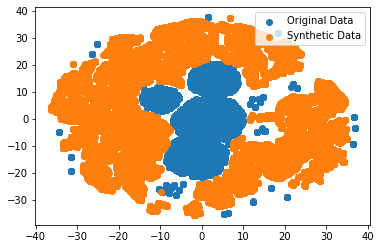

In [9]:
from sklearn.manifold import TSNE
import numpy as np
original_data = original_df
synthetic_data = vae_data
# Perform t-SNE embedding on original and synthetic data
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(np.vstack((original_data, synthetic_data)))

# Visualize the data using scatter plot
plt.scatter(X_tsne[:len(original_data), 0], X_tsne[:len(original_data), 1], label='Original Data')
plt.scatter(X_tsne[len(original_data):, 0], X_tsne[len(original_data):, 1], label='Synthetic Data')
plt.legend()
plt.show()

# Histogram Distribution for all datasets:

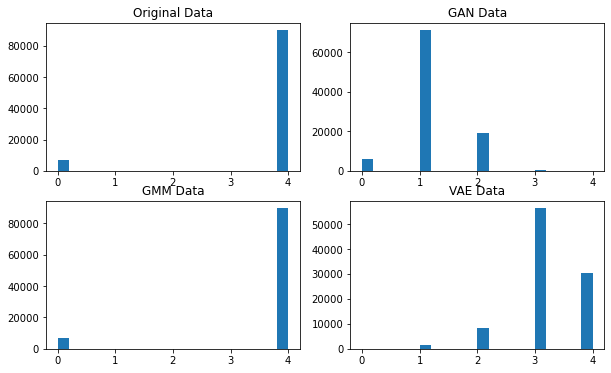

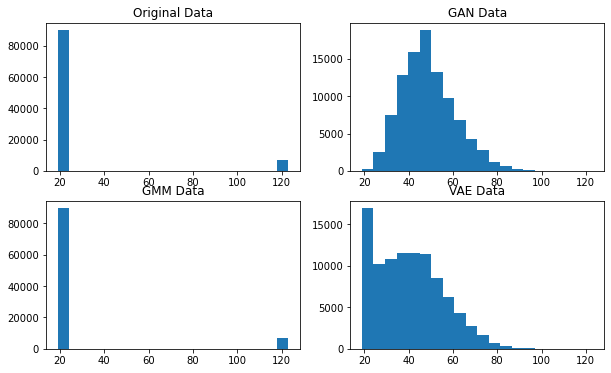

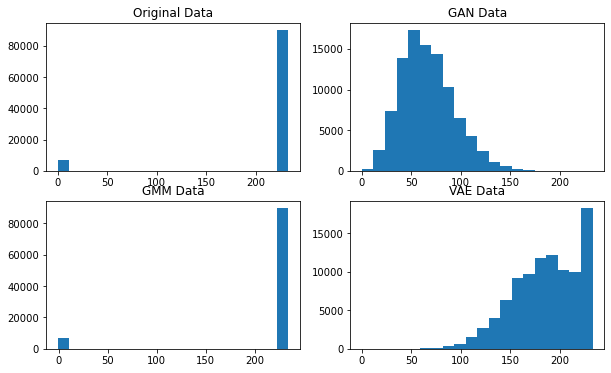

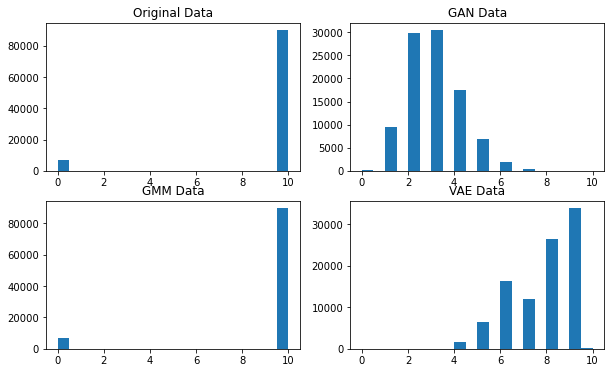

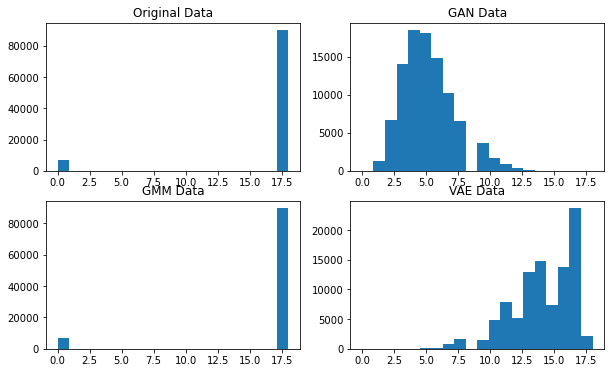

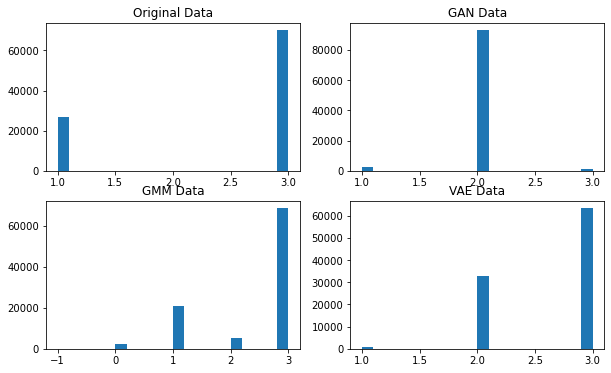

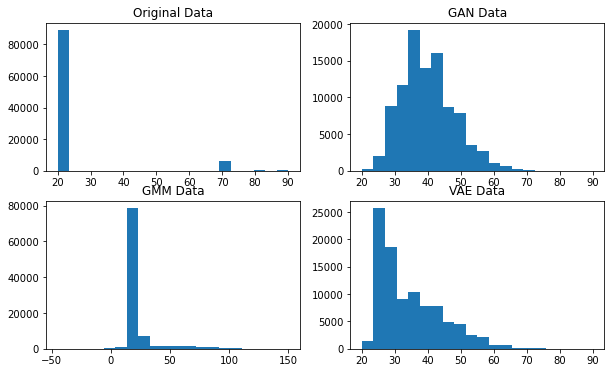

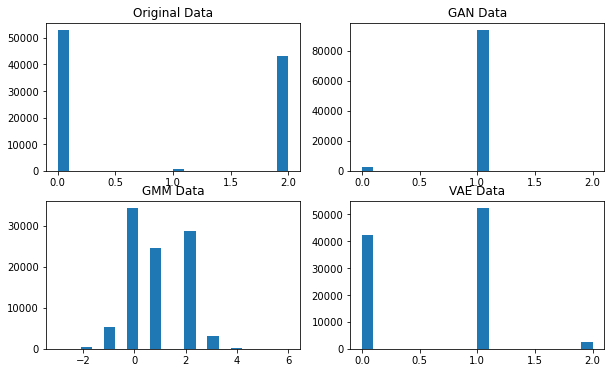

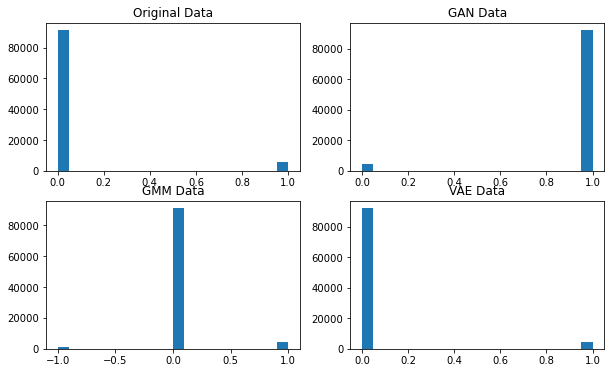

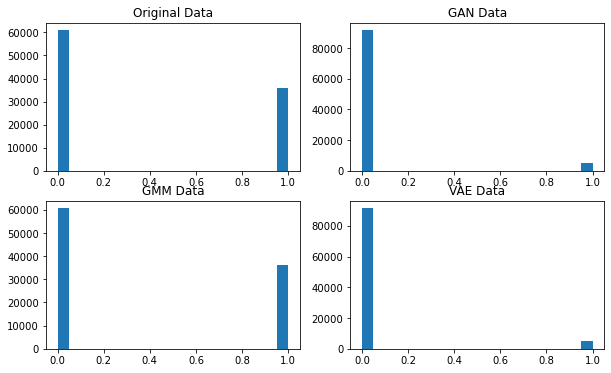

In [10]:
# Plot histograms for each variable in each dataset
for col in original_data.columns:
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    axs[0, 0].hist(original_data[col], bins=20)
    axs[0, 0].set_title("Original Data")
    axs[0, 1].hist(gan_data[col], bins=20)
    axs[0, 1].set_title("GAN Data")
    axs[1, 0].hist(gmm_data[col], bins=20)
    axs[1, 0].set_title("GMM Data")
    axs[1, 1].hist(vae_data[col], bins=20)
    axs[1, 1].set_title("VAE Data")
    plt.show()

# Scatter plot distribution for all datasets:

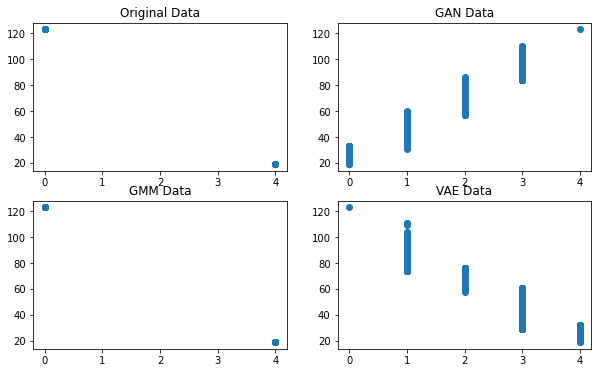

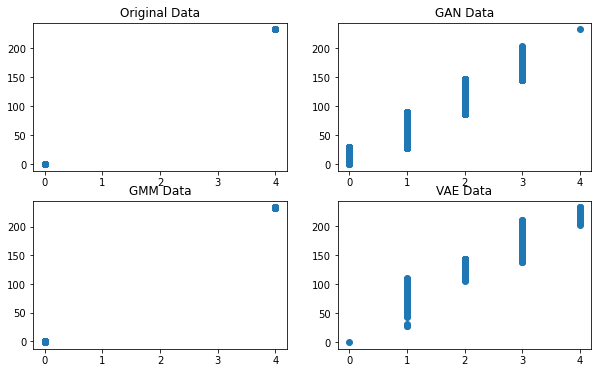

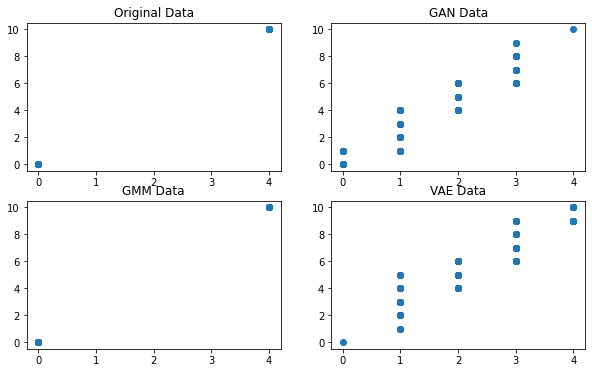

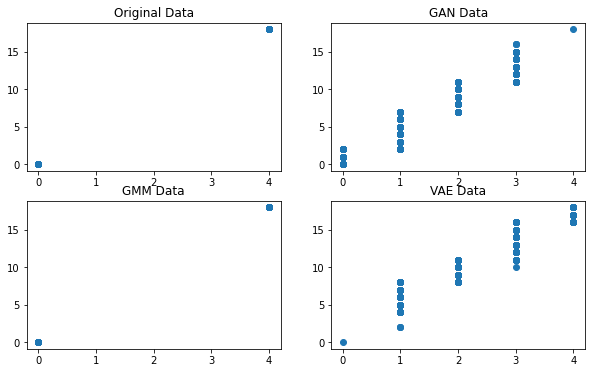

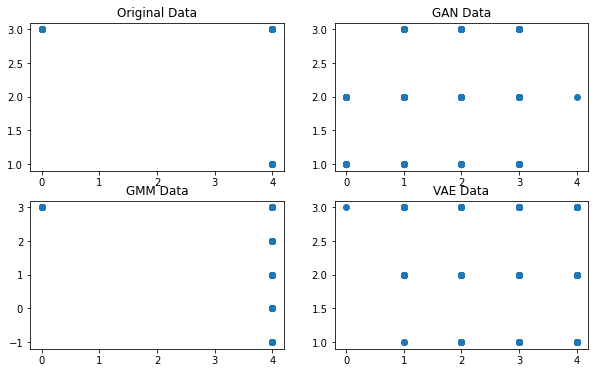

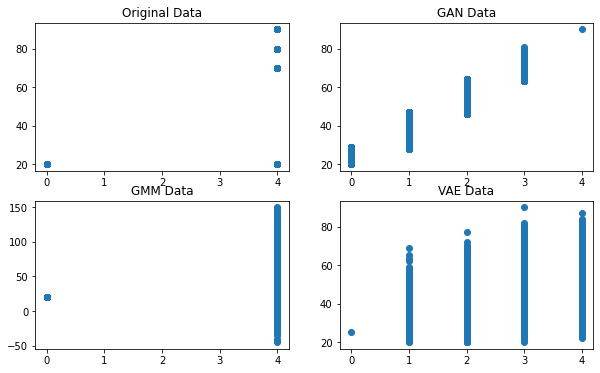

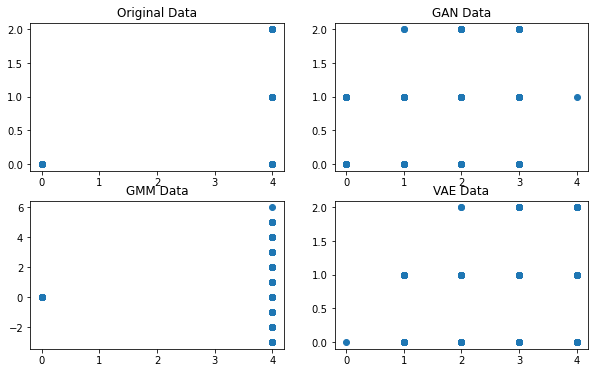

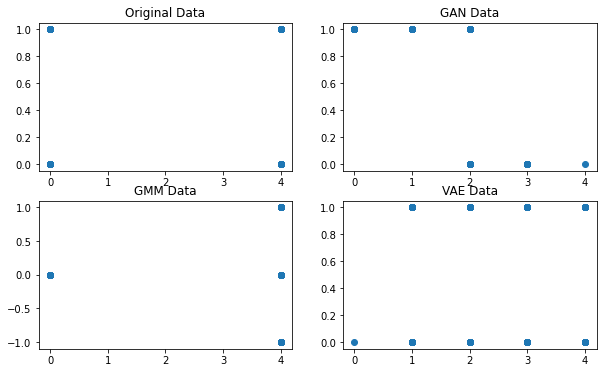

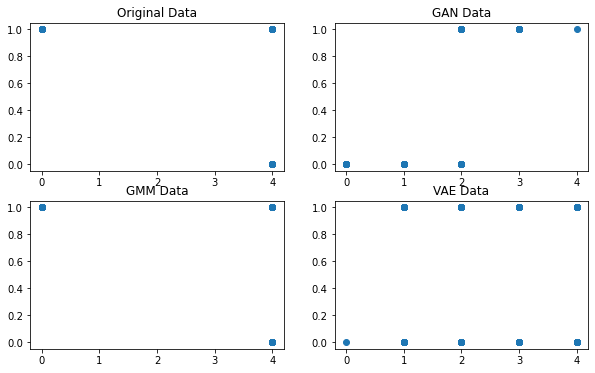

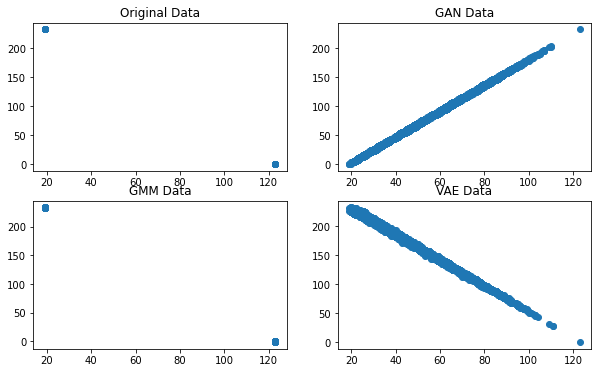

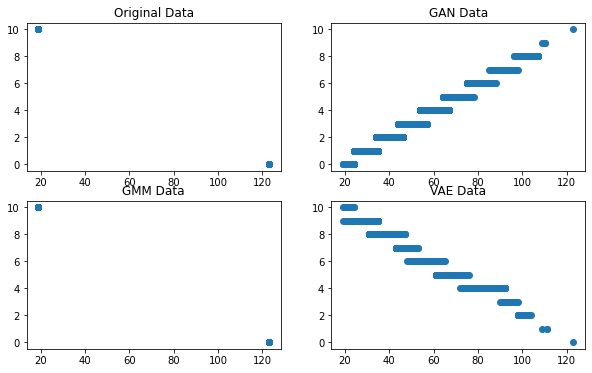

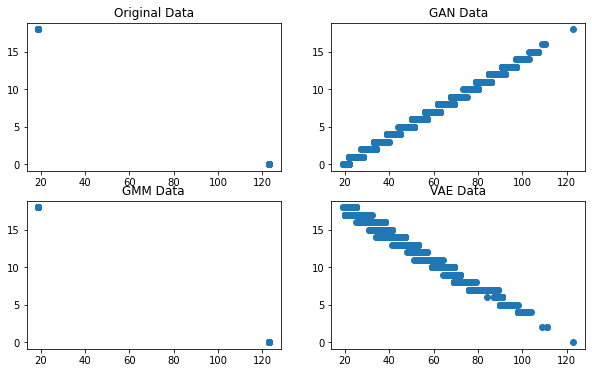

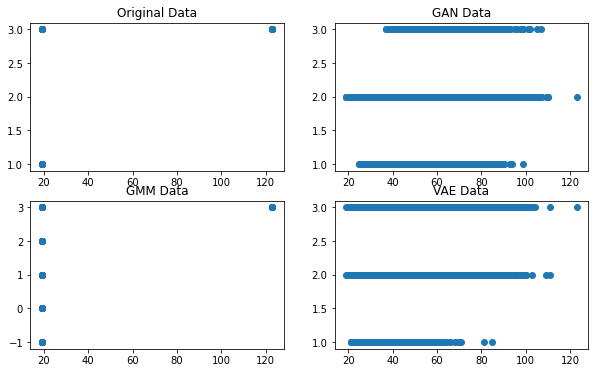

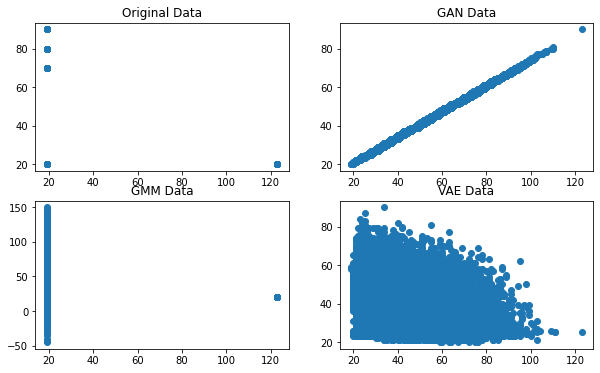

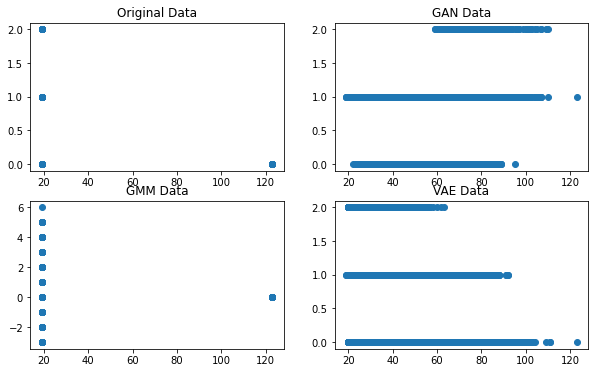

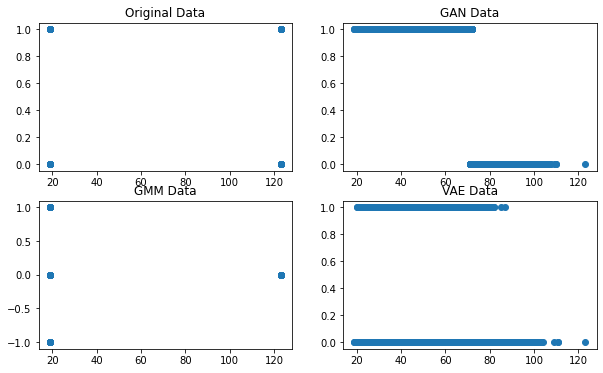

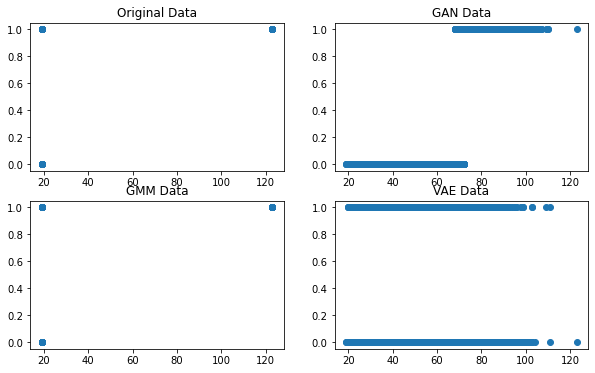

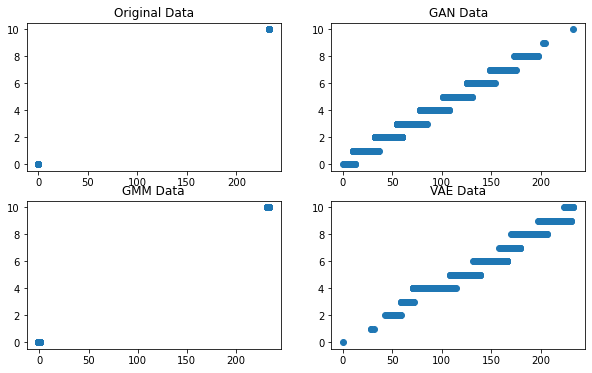

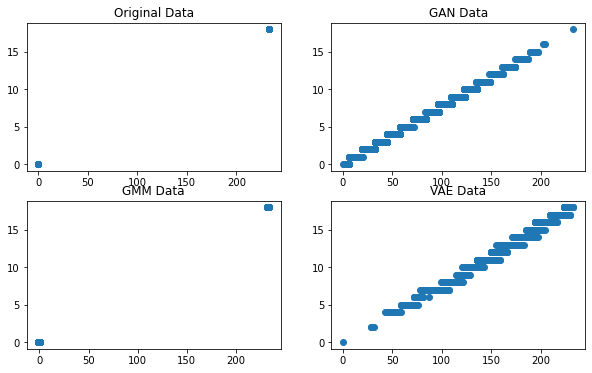

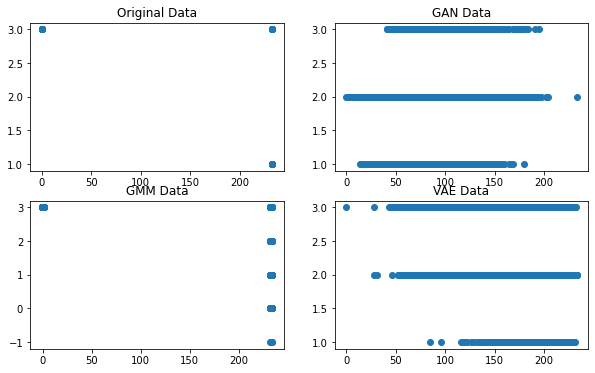

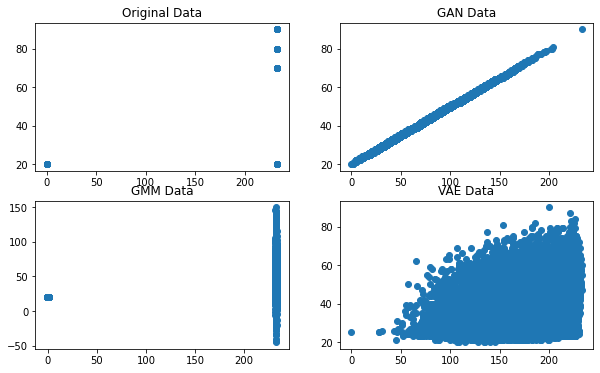

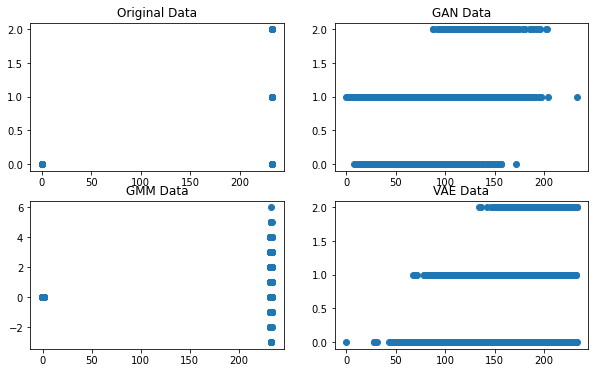

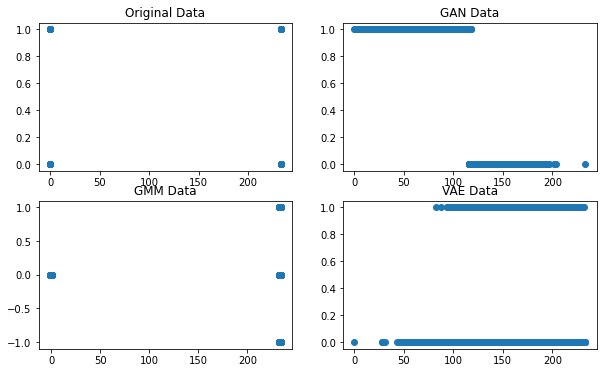

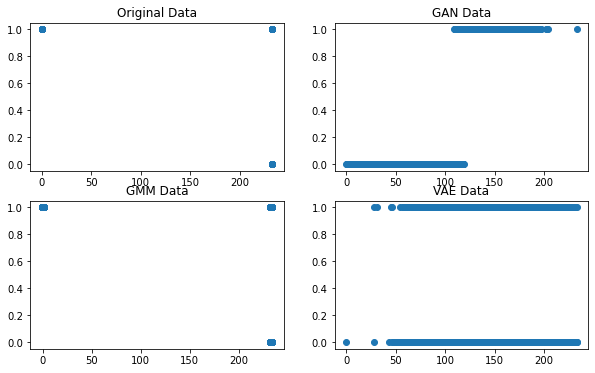

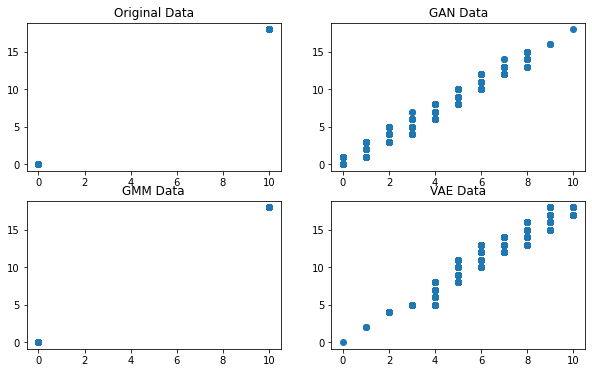

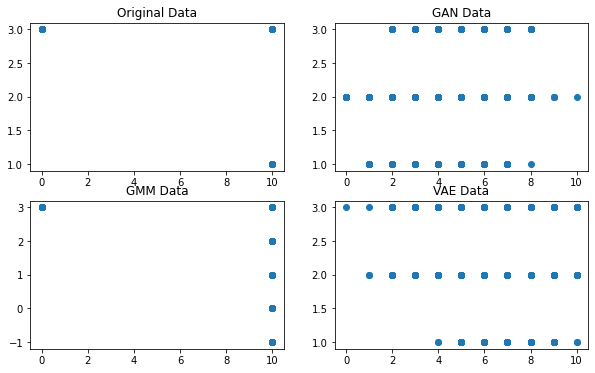

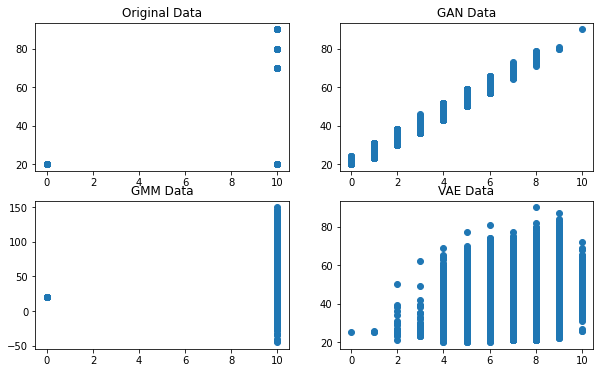

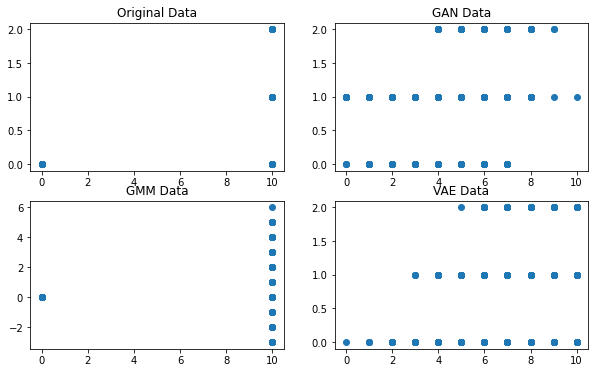

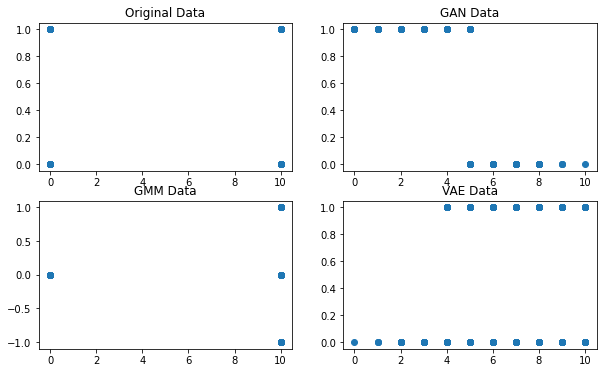

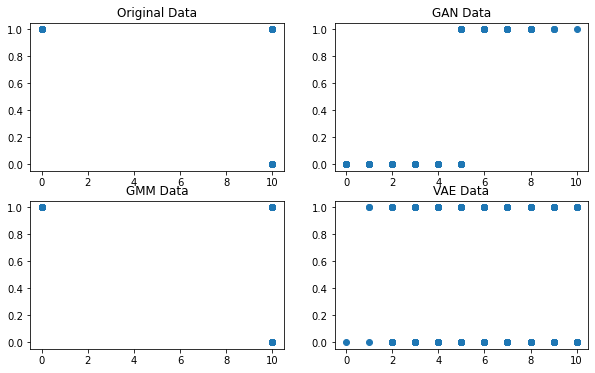

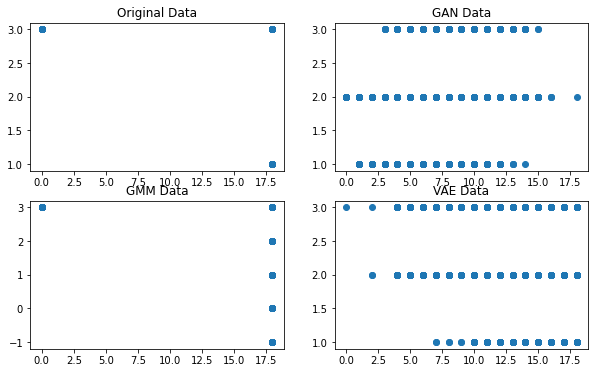

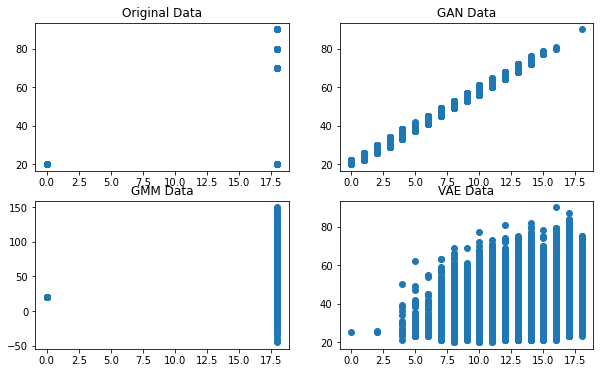

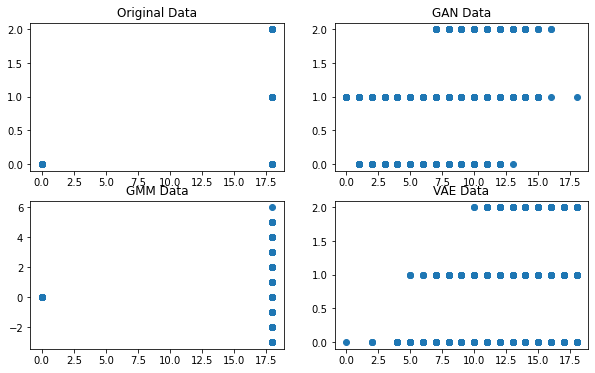

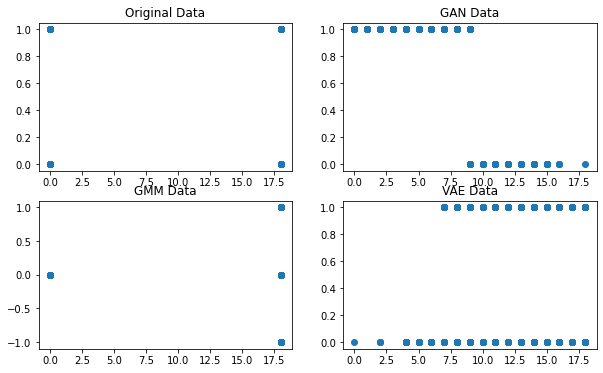

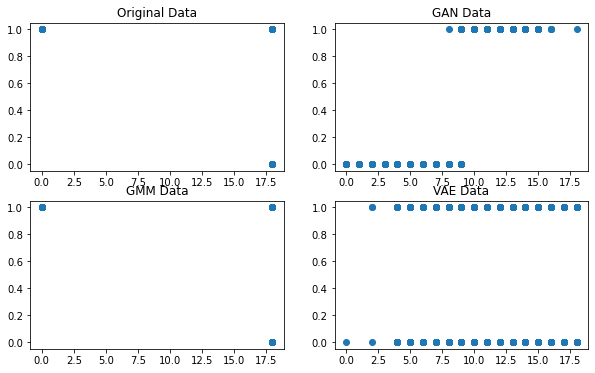

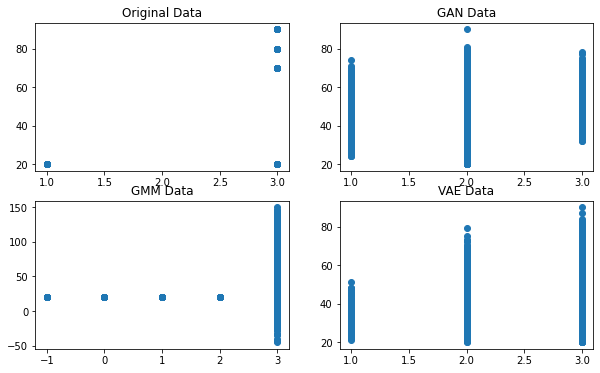

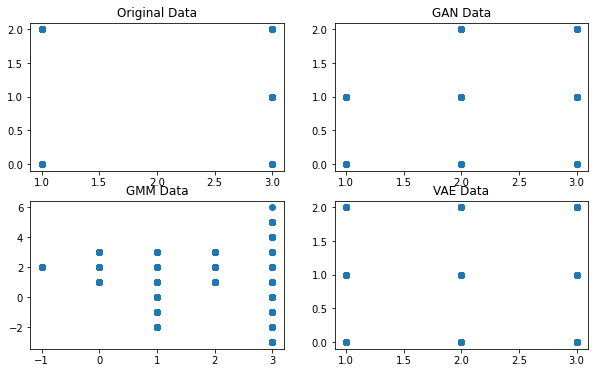

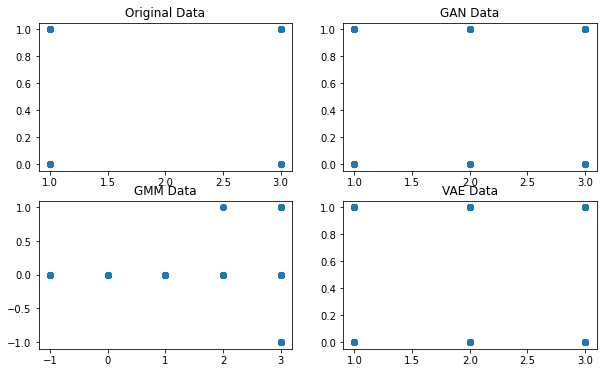

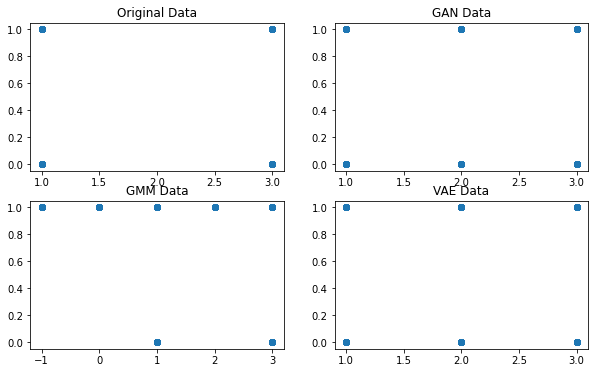

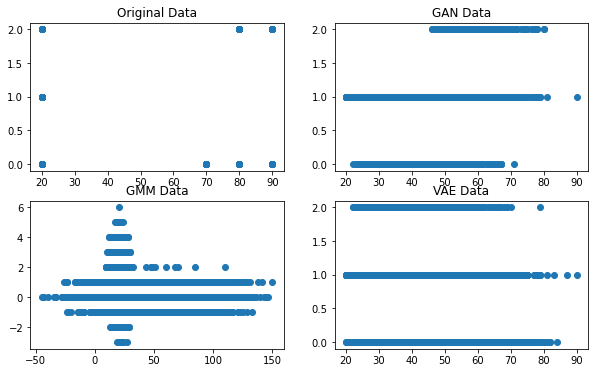

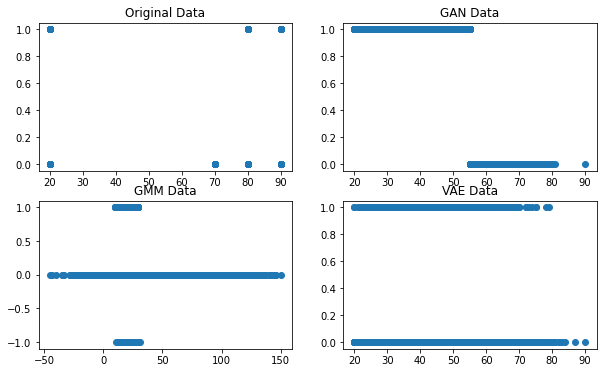

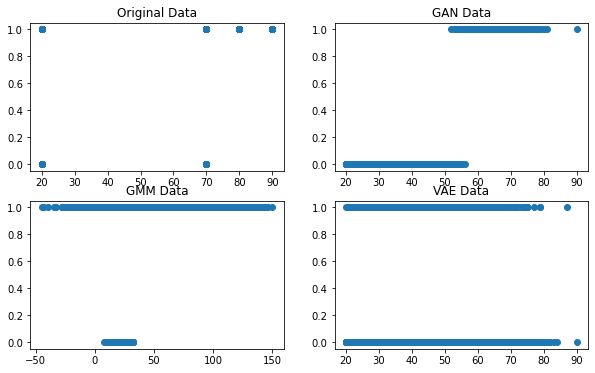

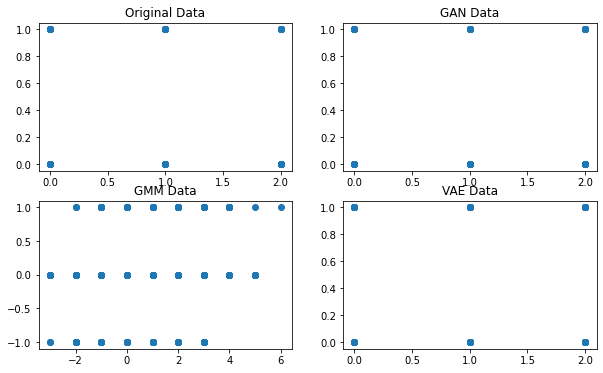

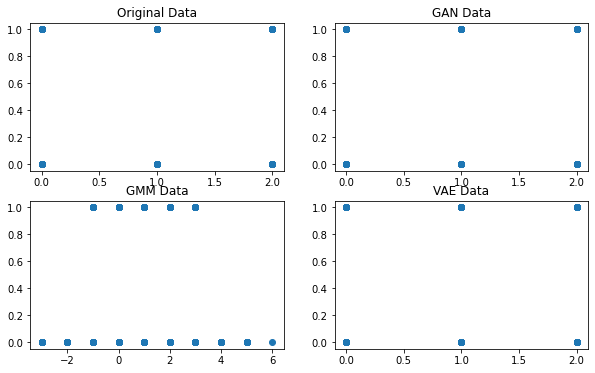

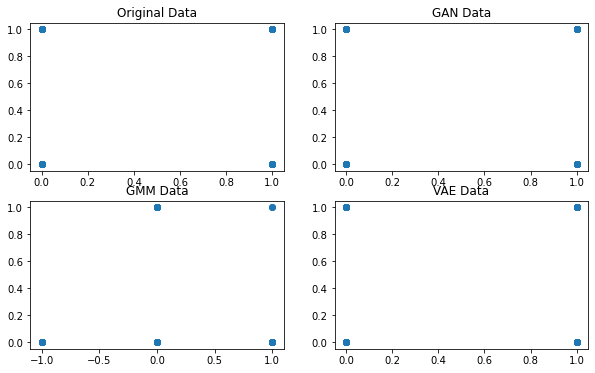

In [11]:
# Plot scatterplots for each pair of variables in each dataset
for i, col1 in enumerate(original_data.columns):
    for j, col2 in enumerate(original_data.columns):
        if i < j:
            fig, axs = plt.subplots(2, 2, figsize=(10, 6))
            axs[0, 0].scatter(original_data[col1], original_data[col2])
            axs[0, 0].set_title("Original Data")
            axs[0, 1].scatter(gan_data[col1], gan_data[col2])
            axs[0, 1].set_title("GAN Data")
            axs[1, 0].scatter(gmm_data[col1], gmm_data[col2])
            axs[1, 0].set_title("GMM Data")
            axs[1, 1].scatter(vae_data[col1], vae_data[col2])
            axs[1, 1].set_title("VAE Data")
            plt.show()

# Mutual Information (MI) score:

In [27]:
# Calculate MI score for each feature
X = original_data
X_synth = gan_data
mi_orig = mutual_info_regression(X, y=np.mean(X, axis=1))

# then, we calculate the MI score for the synthetic dataset
mi_synth = mutual_info_regression(X_synth, y=np.mean(X_synth, axis=1))

# finally, we calculate the absolute difference between the two MI scores
mi_diff = np.abs(mi_orig - mi_synth)

# we can print the MI score difference as follows
print("MI score difference:", np.mean(mi_diff))

MI score difference: 0.775173152087084


In [25]:
# Calculate MI score for each feature
X = original_data
X_synth = gmm_data
mi_orig = mutual_info_regression(X, y=np.mean(X, axis=1))

# then, we calculate the MI score for the synthetic dataset
mi_synth = mutual_info_regression(X_synth, y=np.mean(X_synth, axis=1))

# finally, we calculate the absolute difference between the two MI scores
mi_diff = np.abs(mi_orig - mi_synth)

# we can print the MI score difference as follows
print("MI score difference:", np.mean(mi_diff))

MI score difference: 0.1090465531837681


In [26]:
# Calculate MI score for each feature
X = original_data
X_synth = vae_data
mi_orig = mutual_info_regression(X, y=np.mean(X, axis=1))

# then, we calculate the MI score for the synthetic dataset
mi_synth = mutual_info_regression(X_synth, y=np.mean(X_synth, axis=1))

# finally, we calculate the absolute difference between the two MI scores
mi_diff = np.abs(mi_orig - mi_synth)

# we can print the MI score difference as follows
print("MI score difference:", np.mean(mi_diff))

MI score difference: 0.4446043045940858


# Kernel Density Estimation (KDE):

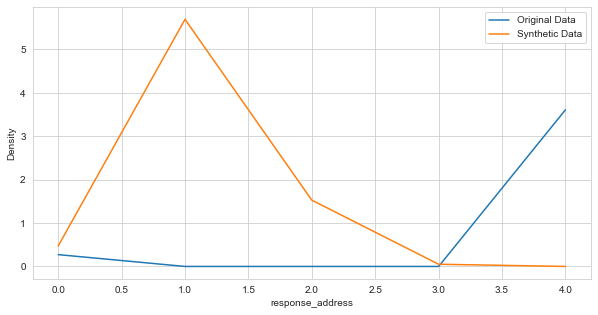

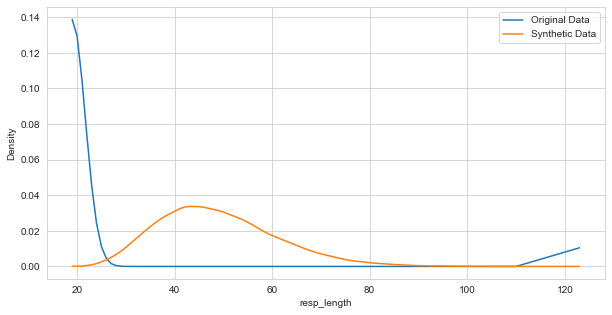

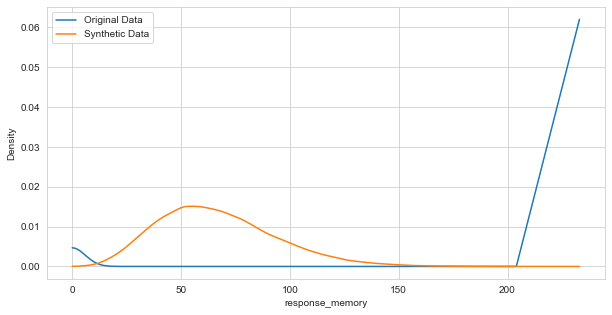

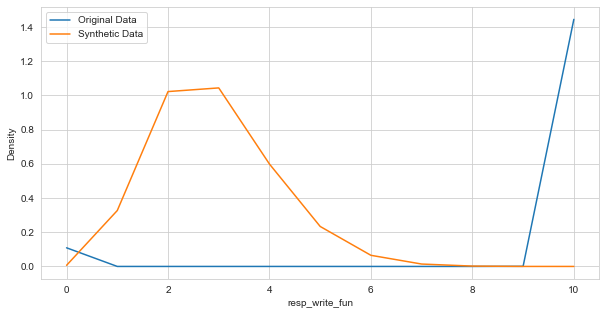

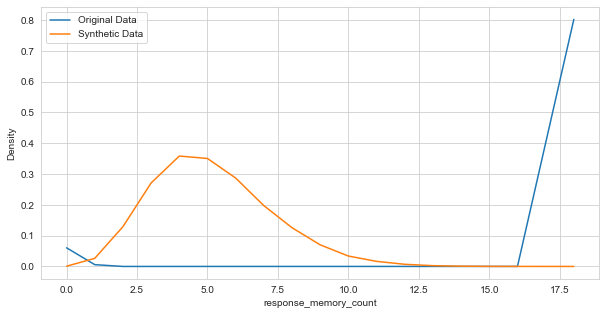

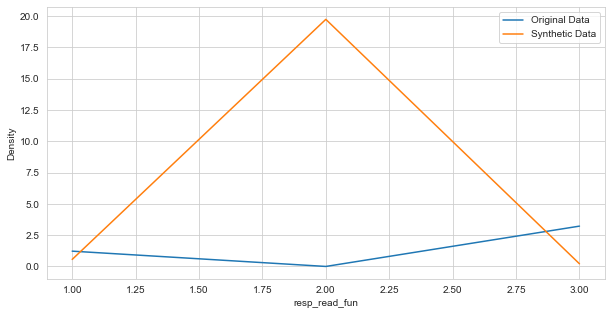

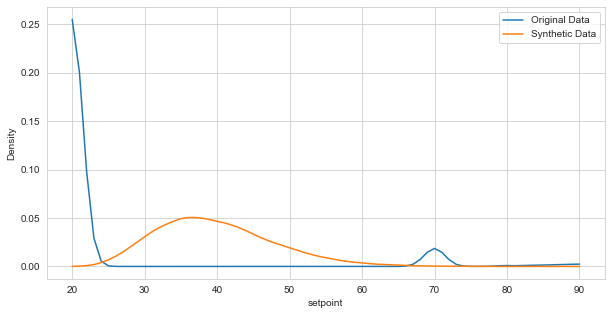

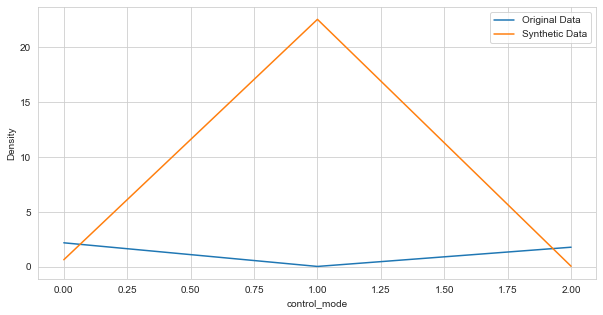

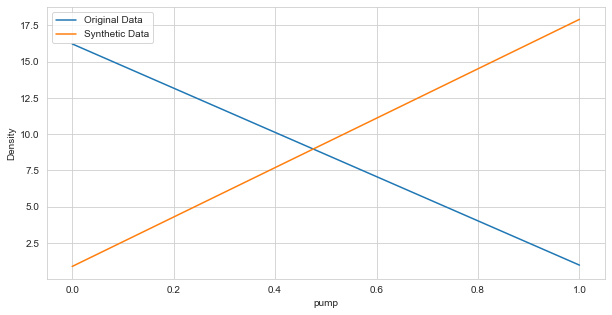

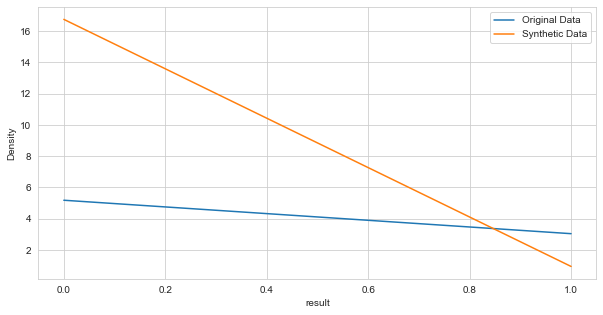

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load original and synthetic data
original_data = original_data
synthetic_data = gan_data

# Concatenate the two dataframes
concat_data = pd.concat([original_data, synthetic_data])

# Loop over each column in the dataset
for column in concat_data.columns:
    # Create a KDE object for the original and synthetic data
    original_kde = gaussian_kde(original_data[column])
    synthetic_kde = gaussian_kde(synthetic_data[column])

    # Evaluate the KDE for plotting
    x = pd.Series(concat_data[column].sort_values())
    original_density = pd.Series(original_kde(x))
    synthetic_density = pd.Series(synthetic_kde(x))

    # Plot the KDEs for original and synthetic data
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, original_density, label='Original Data')
    ax.plot(x, synthetic_density, label='Synthetic Data')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()
    plt.show()


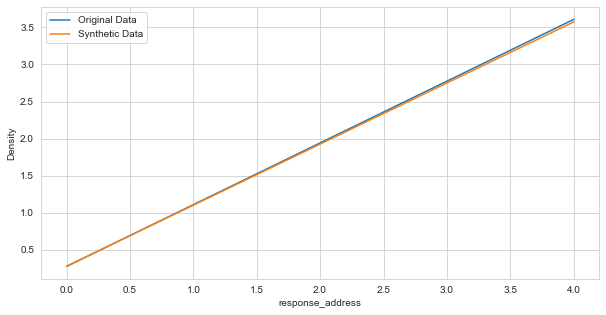

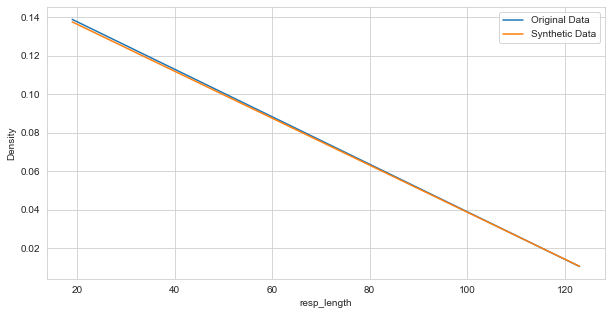

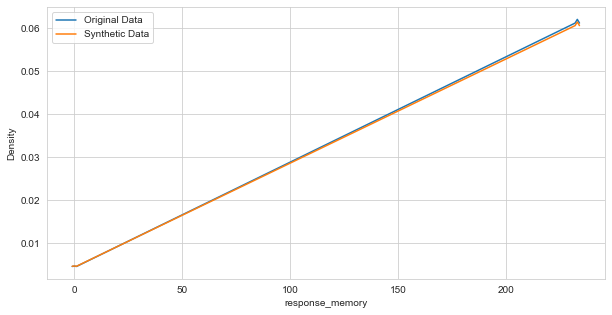

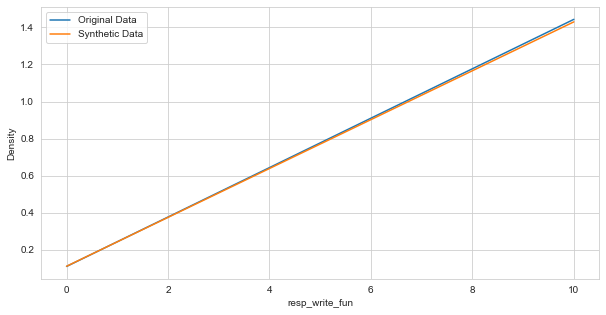

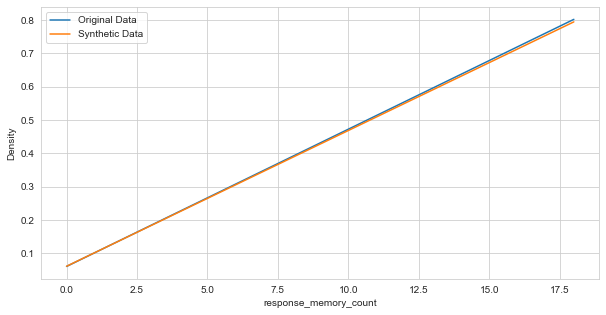

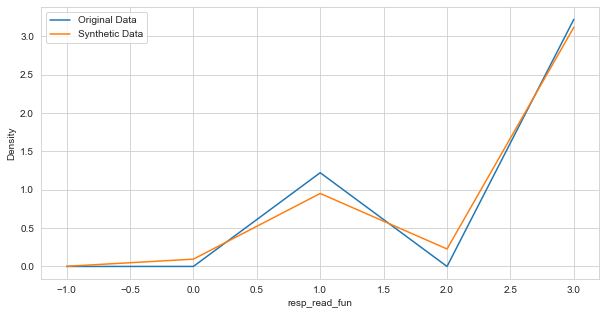

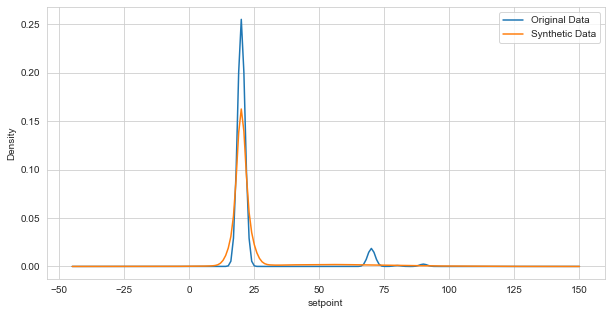

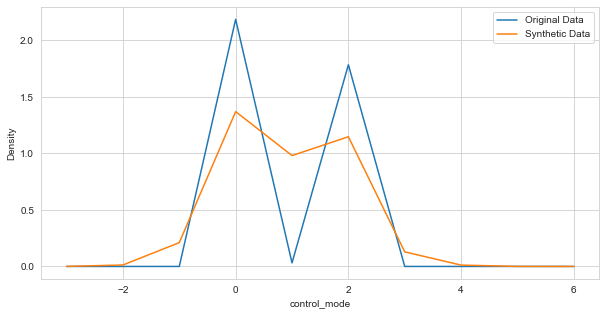

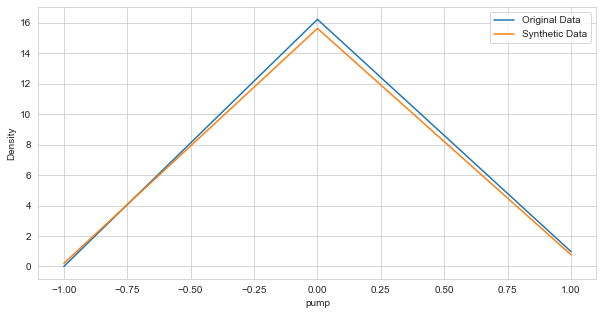

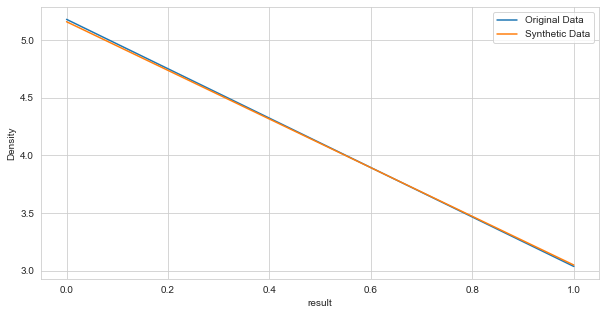

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load original and synthetic data
original_data = original_data
synthetic_data = gmm_data

# Concatenate the two dataframes
concat_data = pd.concat([original_data, synthetic_data])

# Loop over each column in the dataset
for column in concat_data.columns:
    # Create a KDE object for the original and synthetic data
    original_kde = gaussian_kde(original_data[column])
    synthetic_kde = gaussian_kde(synthetic_data[column])

    # Evaluate the KDE for plotting
    x = pd.Series(concat_data[column].sort_values())
    original_density = pd.Series(original_kde(x))
    synthetic_density = pd.Series(synthetic_kde(x))

    # Plot the KDEs for original and synthetic data
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, original_density, label='Original Data')
    ax.plot(x, synthetic_density, label='Synthetic Data')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()
    plt.show()


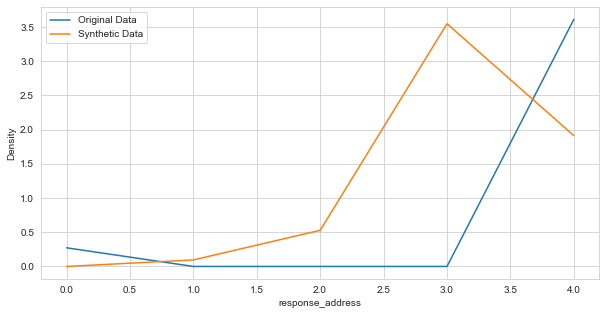

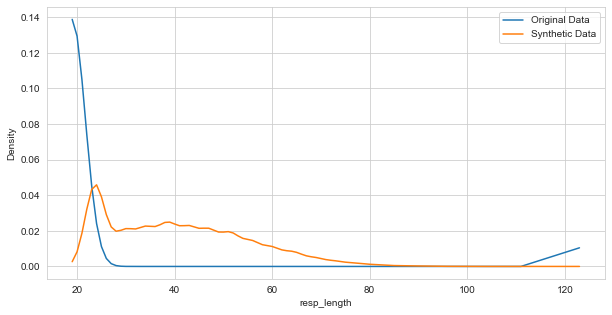

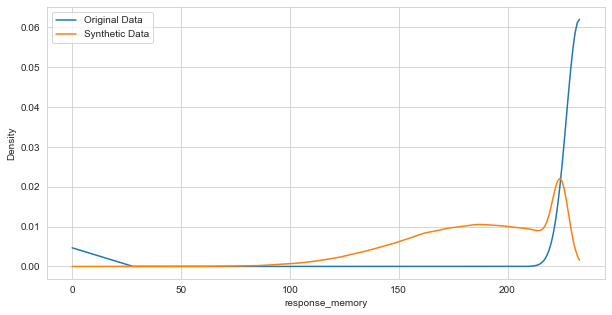

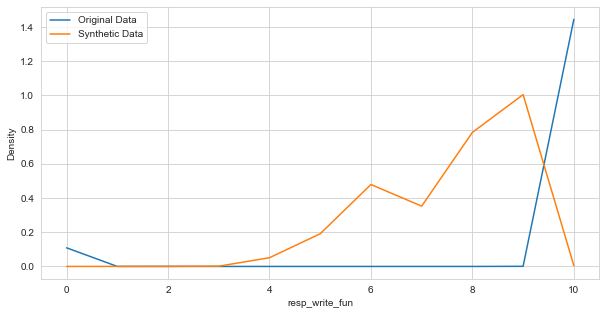

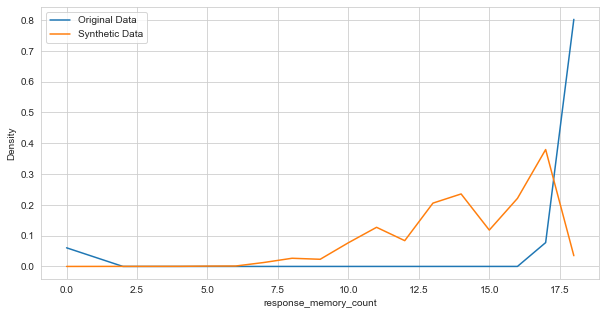

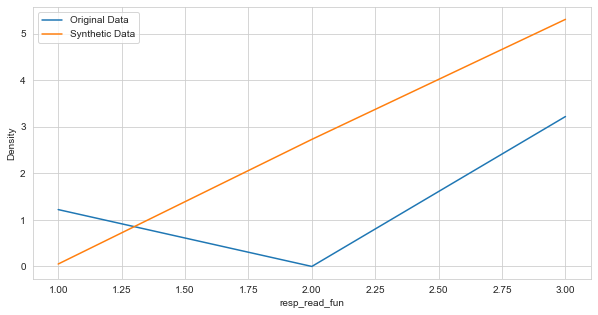

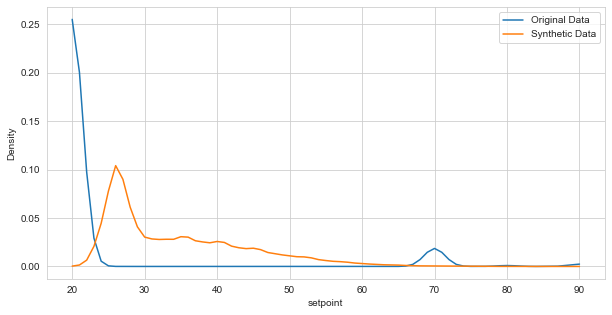

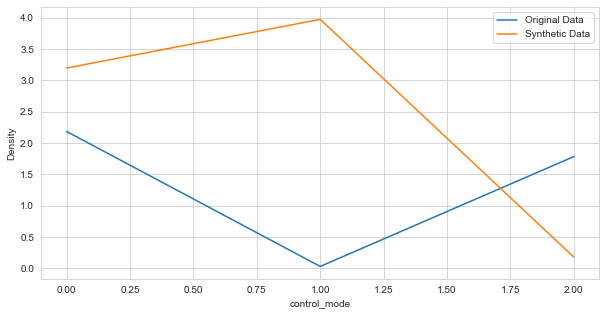

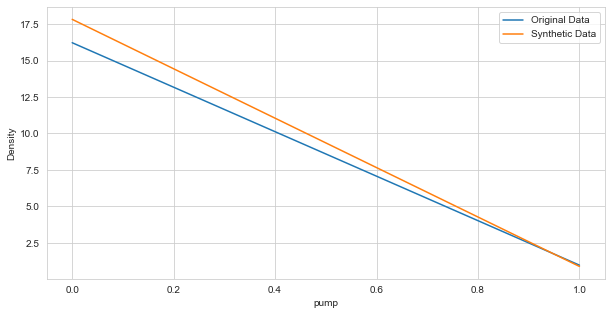

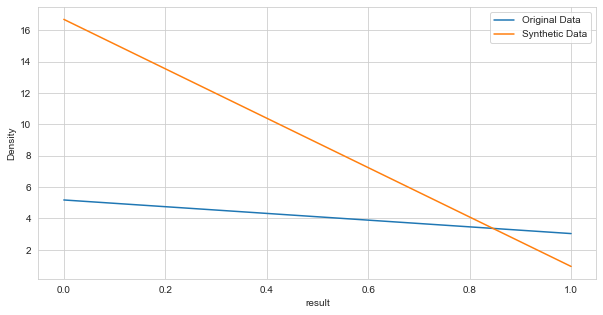

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load original and synthetic data
original_data = original_data
synthetic_data = vae_data

# Concatenate the two dataframes
concat_data = pd.concat([original_data, synthetic_data])

# Loop over each column in the dataset
for column in concat_data.columns:
    # Create a KDE object for the original and synthetic data
    original_kde = gaussian_kde(original_data[column])
    synthetic_kde = gaussian_kde(synthetic_data[column])

    # Evaluate the KDE for plotting
    x = pd.Series(concat_data[column].sort_values())
    original_density = pd.Series(original_kde(x))
    synthetic_density = pd.Series(synthetic_kde(x))

    # Plot the KDEs for original and synthetic data
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, original_density, label='Original Data')
    ax.plot(x, synthetic_density, label='Synthetic Data')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()
    plt.show()


# Wasserstein distance:

In [14]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from pyemd import emd
from scipy.stats import wasserstein_distance
original_data = original_df
# load original and synthetic datasets
orig_df = original_data.sample(frac=0.3, random_state=1)
synth_df = gan_data.sample(frac=0.3, random_state=1)

# extract data arrays from dataframes
orig_data = orig_df.values
synth_data = synth_df.values

# calculate Wasserstein distance
dist_matrix = cdist(orig_data, synth_data, metric='euclidean')
weights = np.ones((len(orig_data),)) / len(orig_data)
wasserstein_dist = emd(weights, weights, dist_matrix)

print("Wasserstein distance between the datasets: {:.4f}".format(wasserstein_dist))


Wasserstein distance between the datasets: 0.0000


In [7]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from pyemd import emd
from scipy.stats import wasserstein_distance
original_data = original_df
# load original and synthetic datasets
orig_df = original_data.sample(frac=0.3, random_state=1)
synth_df = gmm_data.sample(frac=0.3, random_state=1)

# extract data arrays from dataframes
orig_data = orig_df.values
synth_data = synth_df.values

# calculate Wasserstein distance
dist_matrix = cdist(orig_data, synth_data, metric='euclidean')
weights = np.ones((len(orig_data),)) / len(orig_data)
wasserstein_dist = emd(weights, weights, dist_matrix)

print("Wasserstein distance between the datasets: {:.4f}".format(wasserstein_dist))


Wasserstein distance between the datasets: 0.0000


In [4]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from pyemd import emd
from scipy.stats import wasserstein_distance
original_data = original_df
# load original and synthetic datasets
orig_df = original_data.sample(frac=0.3, random_state=1)
synth_df = vae_data.sample(frac=0.3, random_state=1)

# extract data arrays from dataframes
orig_data = orig_df.values
synth_data = synth_df.values

# calculate Wasserstein distance
dist_matrix = cdist(orig_data, synth_data, metric='euclidean')
weights = np.ones((len(orig_data),)) / len(orig_data)
wasserstein_dist = emd(weights, weights, dist_matrix)

print("Wasserstein distance between the datasets: {:.4f}".format(wasserstein_dist))


Wasserstein distance between the datasets: 0.0000


# Cluster Analysis

C:\Users\Gautam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


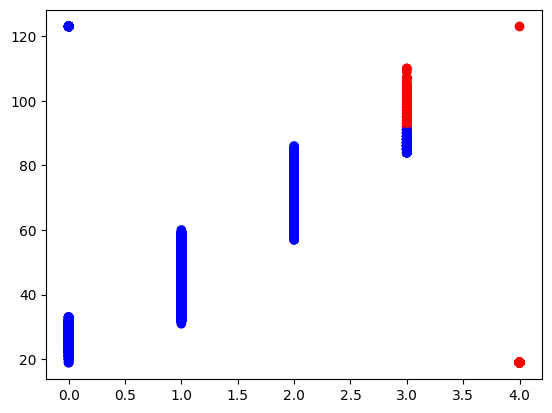

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load original and synthetic data
original_data = original_data
synthetic_data = gan_data

# Drop any irrelevant columns or columns with non-numeric data types
original_data = original_data.select_dtypes(include='number')
synthetic_data = synthetic_data.select_dtypes(include='number')

# Combine original and synthetic data into a single DataFrame
combined_data = pd.concat([original_data, synthetic_data], ignore_index=True)

# Apply KMeans algorithm with k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(combined_data)

# Plot the clusters
colors = ['red', 'blue']
plt.scatter(combined_data.iloc[:, 0], combined_data.iloc[:, 1], c=[colors[i] for i in kmeans.labels_])
plt.show()

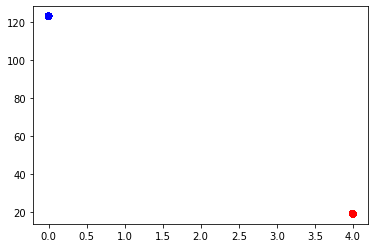

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load original and synthetic data
original_data = original_data
synthetic_data = gmm_data

# Drop any irrelevant columns or columns with non-numeric data types
original_data = original_data.select_dtypes(include='number')
synthetic_data = synthetic_data.select_dtypes(include='number')

# Combine original and synthetic data into a single DataFrame
combined_data = pd.concat([original_data, synthetic_data], ignore_index=True)

# Apply KMeans algorithm with k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(combined_data)


# Plot the clusters
colors = ['red', 'blue']
plt.scatter(combined_data.iloc[:, 0], combined_data.iloc[:, 1], c=[colors[i] for i in kmeans.labels_])
plt.show()

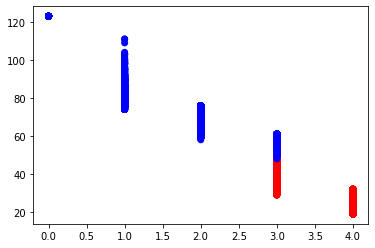

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load original and synthetic data
original_data = original_data
synthetic_data = vae_data

# Drop any irrelevant columns or columns with non-numeric data types
original_data = original_data.select_dtypes(include='number')
synthetic_data = synthetic_data.select_dtypes(include='number')

# Combine original and synthetic data into a single DataFrame
combined_data = pd.concat([original_data, synthetic_data], ignore_index=True)

# Apply KMeans algorithm with k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(combined_data)


# Plot the clusters
colors = ['red', 'blue']
plt.scatter(combined_data.iloc[:, 0], combined_data.iloc[:, 1], c=[colors[i] for i in kmeans.labels_])
plt.show()

# Frechet distance:

In [17]:
from scipy.spatial.distance import euclidean, cdist
from scipy.spatial.distance._frechet_distance import frechet_distance

# Load the original and synthetic datasets
df_original = original_data
df_synthetic = gan_data

# Compute the Frechet Distance between the datasets
X = df_original.values
Y = df_synthetic.values

# Compute the distance matrix between all pairs of points
distance_matrix = cdist(X, Y, euclidean)

# Compute the Frechet Distance
frechet_distance = frechet_distance(X, Y, distance_matrix)

print("Frechet Distance:", frechet_distance)


ModuleNotFoundError: No module named 'scipy.spatial.distance._frechet_distance'; 'scipy.spatial.distance' is not a package

In [38]:
import pandas as pd
from scipy.spatial.distance import euclidean, cdist
from scipy.spatial.distance import frechet_distance

# Load the original and synthetic datasets
df_original = original_data
df_synthetic = gmm_data

# Compute the Frechet Distance between the datasets
X = df_original.values
Y = df_synthetic.values

# Compute the distance matrix between all pairs of points
distance_matrix = cdist(X, Y, euclidean)

# Compute the Frechet Distance
frechet_distance = frechet_distance(X, Y, distance_matrix)

print("Frechet Distance:", frechet_distance)

ImportError: cannot import name 'frechet_distance' from 'scipy.spatial.distance' (C:\Users\Gautam\anaconda3\lib\site-packages\scipy\spatial\distance.py)

In [ ]:
import pandas as pd
from scipy.spatial.distance import euclidean, cdist
from scipy.spatial.distance import frechet_distance

# Load the original and synthetic datasets
df_original = original_data
df_synthetic = vae_data

# Compute the Frechet Distance between the datasets
X = df_original.values
Y = df_synthetic.values

# Compute the distance matrix between all pairs of points
distance_matrix = cdist(X, Y, euclidean)

# Compute the Frechet Distance
frechet_distance = frechet_distance(X, Y, distance_matrix)

print("Frechet Distance:", frechet_distance)

# Decision Tree:

In [39]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# load original and synthetic datasets
original_data = original_data
synthetic_data = gan_data

# separate features and target variable
X = original_data.drop('result', axis=1)
y = original_data['result']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit decision tree on original data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# predict target variable for original data
y_pred_original = dtc.predict(X_test)

# calculate accuracy and classification report for original data
accuracy_original = accuracy_score(y_test, y_pred_original)
report_original = classification_report(y_test, y_pred_original)

# fit decision tree on synthetic data
X_synthetic = synthetic_data.drop('result', axis=1)
y_synthetic = synthetic_data['result']
dtc_synthetic = DecisionTreeClassifier()
dtc_synthetic.fit(X_synthetic, y_synthetic)

# predict target variable for synthetic data
y_pred_synthetic = dtc_synthetic.predict(X_test)

# calculate accuracy and classification report for synthetic data
accuracy_synthetic = accuracy_score(y_test, y_pred_synthetic)
report_synthetic = classification_report(y_test, y_pred_synthetic)

# print results
print('Accuracy for original data:', accuracy_original)
print('Classification report for original data:\n', report_original)
print('Accuracy for synthetic data:', accuracy_synthetic)
print('Classification report for synthetic data:\n', report_synthetic)


Accuracy for original data: 0.9304782519068233
Classification report for original data:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12284
           1       0.96      0.85      0.90      7120

    accuracy                           0.93     19404
   macro avg       0.94      0.91      0.92     19404
weighted avg       0.93      0.93      0.93     19404

Accuracy for synthetic data: 0.2994227994227994
Classification report for synthetic data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     12284
           1       0.32      0.82      0.46      7120

    accuracy                           0.30     19404
   macro avg       0.16      0.41      0.23     19404
weighted avg       0.12      0.30      0.17     19404



In [40]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# load original and synthetic datasets
original_data = original_data
synthetic_data = gmm_data

# separate features and target variable
X = original_data.drop('result', axis=1)
y = original_data['result']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit decision tree on original data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# predict target variable for original data
y_pred_original = dtc.predict(X_test)

# calculate accuracy and classification report for original data
accuracy_original = accuracy_score(y_test, y_pred_original)
report_original = classification_report(y_test, y_pred_original)

# fit decision tree on synthetic data
X_synthetic = synthetic_data.drop('result', axis=1)
y_synthetic = synthetic_data['result']
dtc_synthetic = DecisionTreeClassifier()
dtc_synthetic.fit(X_synthetic, y_synthetic)

# predict target variable for synthetic data
y_pred_synthetic = dtc_synthetic.predict(X_test)

# calculate accuracy and classification report for synthetic data
accuracy_synthetic = accuracy_score(y_test, y_pred_synthetic)
report_synthetic = classification_report(y_test, y_pred_synthetic)

# print results
print('Accuracy for original data:', accuracy_original)
print('Classification report for original data:\n', report_original)
print('Accuracy for synthetic data:', accuracy_synthetic)
print('Classification report for synthetic data:\n', report_synthetic)

Accuracy for original data: 0.9304782519068233
Classification report for original data:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12284
           1       0.96      0.85      0.90      7120

    accuracy                           0.93     19404
   macro avg       0.94      0.91      0.92     19404
weighted avg       0.93      0.93      0.93     19404

Accuracy for synthetic data: 0.9232117089259947
Classification report for synthetic data:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12284
           1       0.96      0.82      0.89      7120

    accuracy                           0.92     19404
   macro avg       0.93      0.90      0.91     19404
weighted avg       0.93      0.92      0.92     19404



In [41]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# load original and synthetic datasets
original_data = original_data
synthetic_data = vae_data

# separate features and target variable
X = original_data.drop('result', axis=1)
y = original_data['result']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit decision tree on original data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# predict target variable for original data
y_pred_original = dtc.predict(X_test)

# calculate accuracy and classification report for original data
accuracy_original = accuracy_score(y_test, y_pred_original)
report_original = classification_report(y_test, y_pred_original)

# fit decision tree on synthetic data
X_synthetic = synthetic_data.drop('result', axis=1)
y_synthetic = synthetic_data['result']
dtc_synthetic = DecisionTreeClassifier()
dtc_synthetic.fit(X_synthetic, y_synthetic)

# predict target variable for synthetic data
y_pred_synthetic = dtc_synthetic.predict(X_test)

# calculate accuracy and classification report for synthetic data
accuracy_synthetic = accuracy_score(y_test, y_pred_synthetic)
report_synthetic = classification_report(y_test, y_pred_synthetic)

# print results
print('Accuracy for original data:', accuracy_original)
print('Classification report for original data:\n', report_original)
print('Accuracy for synthetic data:', accuracy_synthetic)
print('Classification report for synthetic data:\n', report_synthetic)

Accuracy for original data: 0.9304782519068233
Classification report for original data:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12284
           1       0.96      0.85      0.90      7120

    accuracy                           0.93     19404
   macro avg       0.94      0.91      0.92     19404
weighted avg       0.93      0.93      0.93     19404

Accuracy for synthetic data: 0.6369305297876726
Classification report for synthetic data:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78     12284
           1       1.00      0.01      0.02      7120

    accuracy                           0.64     19404
   macro avg       0.82      0.51      0.40     19404
weighted avg       0.77      0.64      0.50     19404



# Feature Importance:

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# load the synthetic data
synthetic_data = gan_data

# load the original data
original_data = original_data

# separate the features and target variable
X_synthetic = synthetic_data.drop(columns=["result"])
y_synthetic = synthetic_data["result"]

X_original = original_data.drop(columns=["result"])
y_original = original_data["result"]

# train a random forest classifier on the original data
rf = RandomForestClassifier()
rf.fit(X_original, y_original)

# calculate the feature importance of the original data
original_feature_importance = rf.feature_importances_

# train a random forest classifier on the synthetic data
rf.fit(X_synthetic, y_synthetic)

# calculate the feature importance of the synthetic data
synthetic_feature_importance = rf.feature_importances_

# compare the feature importance of the original and synthetic data
print("Original Feature Importance:", original_feature_importance)
print("Synthetic Feature Importance:", synthetic_feature_importance)


Original Feature Importance: [0.04047268 0.03657814 0.04702534 0.03535199 0.03022612 0.29781821
 0.23147441 0.26938562 0.01166749]
Synthetic Feature Importance: [0.00473554 0.18249142 0.44117087 0.01748763 0.07397905 0.00145167
 0.17235447 0.00100415 0.10532521]


In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# load the synthetic data
synthetic_data = gmm_data

# load the original data
original_data = original_data

# separate the features and target variable
X_synthetic = synthetic_data.drop(columns=["result"])
y_synthetic = synthetic_data["result"]

X_original = original_data.drop(columns=["result"])
y_original = original_data["result"]

# train a random forest classifier on the original data
rf = RandomForestClassifier()
rf.fit(X_original, y_original)

# calculate the feature importance of the original data
original_feature_importance = rf.feature_importances_

# train a random forest classifier on the synthetic data
rf.fit(X_synthetic, y_synthetic)

# calculate the feature importance of the synthetic data
synthetic_feature_importance = rf.feature_importances_

# compare the feature importance of the original and synthetic data
print("Original Feature Importance:", original_feature_importance)
print("Synthetic Feature Importance:", synthetic_feature_importance)


Original Feature Importance: [0.04342409 0.04388343 0.03370296 0.02628716 0.04178168 0.31432631
 0.23506253 0.25148647 0.01004537]
Synthetic Feature Importance: [0.03338723 0.02646236 0.02719719 0.03393762 0.0384217  0.24115417
 0.35221881 0.23982815 0.00739278]


In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# load the synthetic data
synthetic_data = vae_data

# load the original data
original_data = original_data

# separate the features and target variable
X_synthetic = synthetic_data.drop(columns=["result"])
y_synthetic = synthetic_data["result"]

X_original = original_data.drop(columns=["result"])
y_original = original_data["result"]

# train a random forest classifier on the original data
rf = RandomForestClassifier()
rf.fit(X_original, y_original)

# calculate the feature importance of the original data
original_feature_importance = rf.feature_importances_

# train a random forest classifier on the synthetic data
rf.fit(X_synthetic, y_synthetic)

# calculate the feature importance of the synthetic data
synthetic_feature_importance = rf.feature_importances_

# compare the feature importance of the original and synthetic data
print("Original Feature Importance:", original_feature_importance)
print("Synthetic Feature Importance:", synthetic_feature_importance)


Original Feature Importance: [0.03215307 0.0295622  0.03265624 0.04924049 0.04402649 0.3202203
 0.2404422  0.23870251 0.01299649]
Synthetic Feature Importance: [0.00557989 0.14308656 0.27891049 0.0118397  0.02963738 0.04492673
 0.44546204 0.02268573 0.01787148]


# Partial Dependence Plots:

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from pdpbox import pdp, get_dataset, info_plots

# Load original and synthetic datasets
original_df = original_data
synthetic_df = gan_data

# Separate features and target variable
X_original = original_df.drop("result", axis=1)
y_original = original_df["result"]
X_synthetic = synthetic_df.drop("result", axis=1)
y_synthetic = synthetic_df["result"]

# Fit random forest model on original data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_original, y_original)

# Generate partial dependence plots for all features in original and synthetic datasets
for feature in X_original.columns:
    fig, axes = pdp.pdp_isolate(
        model=model,
        dataset=X_original,
        model_features=X_original.columns,
        feature=feature,
        num_grid_points=50,
    )
    _ = axes["pdp_ax"].set_xticklabels([])
    _ = axes["pdp_ax"].set_xlabel(feature)
    _ = axes["pdp_ax"].set_ylabel("Partial dependence")
    _ = axes["title_ax"].set_title("Original data")
    fig.savefig(f"pdp_original_gan_{feature}.png")
    
    fig, axes = pdp.pdp_isolate(
        model=model,
        dataset=X_synthetic,
        model_features=X_synthetic.columns,
        feature=feature,
        num_grid_points=50,
    )
    _ = axes["pdp_ax"].set_xticklabels([])
    _ = axes["pdp_ax"].set_xlabel(feature)
    _ = axes["pdp_ax"].set_ylabel("Partial dependence")
    _ = axes["title_ax"].set_title("Synthetic data")
    fig.savefig(f"pdp_synthetic_gan_{feature}.png")


ModuleNotFoundError: No module named 'pdpbox'

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from pdpbox import pdp, get_dataset, info_plots

# Load original and synthetic datasets
original_df = original_data
synthetic_df = gmm_data

# Separate features and target variable
X_original = original_df.drop("result", axis=1)
y_original = original_df["result"]
X_synthetic = synthetic_df.drop("result", axis=1)
y_synthetic = synthetic_df["result"]

# Fit random forest model on original data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_original, y_original)

# Generate partial dependence plots for all features in original and synthetic datasets
for feature in X_original.columns:
    fig, axes = pdp.pdp_isolate(
        model=model,
        dataset=X_original,
        model_features=X_original.columns,
        feature=feature,
        num_grid_points=50,
    )
    _ = axes["pdp_ax"].set_xticklabels([])
    _ = axes["pdp_ax"].set_xlabel(feature)
    _ = axes["pdp_ax"].set_ylabel("Partial dependence")
    _ = axes["title_ax"].set_title("Original data")
    fig.savefig(f"pdp_original_gmm_{feature}.png")
    
    fig, axes = pdp.pdp_isolate(
        model=model,
        dataset=X_synthetic,
        model_features=X_synthetic.columns,
        feature=feature,
        num_grid_points=50,
    )
    _ = axes["pdp_ax"].set_xticklabels([])
    _ = axes["pdp_ax"].set_xlabel(feature)
    _ = axes["pdp_ax"].set_ylabel("Partial dependence")
    _ = axes["title_ax"].set_title("Synthetic data")
    fig.savefig(f"pdp_synthetic_gmm_{feature}.png")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from pdpbox import pdp, get_dataset, info_plots

# Load original and synthetic datasets
original_df = original_data
synthetic_df = vae_data

# Separate features and target variable
X_original = original_df.drop("result", axis=1)
y_original = original_df["result"]
X_synthetic = synthetic_df.drop("result", axis=1)
y_synthetic = synthetic_df["result"]

# Fit random forest model on original data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_original, y_original)

# Generate partial dependence plots for all features in original and synthetic datasets
for feature in X_original.columns:
    fig, axes = pdp.pdp_isolate(
        model=model,
        dataset=X_original,
        model_features=X_original.columns,
        feature=feature,
        num_grid_points=50,
    )
    _ = axes["pdp_ax"].set_xticklabels([])
    _ = axes["pdp_ax"].set_xlabel(feature)
    _ = axes["pdp_ax"].set_ylabel("Partial dependence")
    _ = axes["title_ax"].set_title("Original data")
    fig.savefig(f"pdp_original_vae_{feature}.png")
    
    fig, axes = pdp.pdp_isolate(
        model=model,
        dataset=X_synthetic,
        model_features=X_synthetic.columns,
        feature=feature,
        num_grid_points=50,
    )
    _ = axes["pdp_ax"].set_xticklabels([])
    _ = axes["pdp_ax"].set_xlabel(feature)
    _ = axes["pdp_ax"].set_ylabel("Partial dependence")
    _ = axes["title_ax"].set_title("Synthetic data")
    fig.savefig(f"pdp_synthetic_vae_{feature}.png")
